In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('BankNoteAuthentication.csv')

In [54]:
(df.head())

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop(columns=['class'])
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
print("NAIVE BAYERS CLASSFICATION")

NAIVE BAYERS CLASSFICATION


In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [18]:
nb.fit(X_train,y_train)

GaussianNB()

In [19]:
print("TESTING SCORE")
nb.score(X_test,y_test)

TESTING SCORE


0.8388520971302428

In [20]:
y_pred = nb.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print("CONFUSION MATRIX")
confusion_matrix(y_test,y_pred)

CONFUSION MATRIX


array([[233,  24],
       [ 49, 147]], dtype=int64)

In [23]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       257
           1       0.86      0.75      0.80       196

    accuracy                           0.84       453
   macro avg       0.84      0.83      0.83       453
weighted avg       0.84      0.84      0.84       453



In [24]:
X=df.drop(columns=['class'])
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
print("\nDECISION TREE CLASSIFIER")
from sklearn import tree
dt = tree.DecisionTreeClassifier()


DECISION TREE CLASSIFIER


In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
print("Testing Score")
dt.score(X_test,y_test)

Testing Score


0.9823399558498896

In [28]:
y_pred_dt = dt.predict(X_test)

In [29]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred_dt)

Confusion Matrix


array([[256,   1],
       [  7, 189]], dtype=int64)

In [30]:
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       257
           1       0.99      0.96      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [31]:
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [32]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

array([3.53141174e-02, 2.28156453e-01, 1.75722373e-01, 4.46055880e-01,
       1.00886134e-02, 4.76389557e-03, 1.18933031e-01, 5.15649560e-04,
       4.55075785e-03, 8.32538010e-02, 9.75607818e-02, 5.13187032e-01,
       7.17365700e-01, 9.67403753e-01, 9.48550619e-01, 9.11428481e-02,
       8.46884476e-01, 8.41699891e-01, 9.99998446e-01, 8.94032513e-01,
       9.89569267e-03, 7.75671961e-02, 8.26431332e-01, 2.65452592e-03,
       9.68925325e-01, 2.02318930e-03, 4.49644336e-03, 9.59615199e-01,
       1.86622227e-04, 3.16230438e-04, 5.18772829e-01, 8.86928986e-02,
       1.82223559e-01, 9.83256623e-01, 9.41593236e-01, 1.96547573e-03,
       8.61672805e-02, 3.43022240e-01, 5.91563328e-01, 6.67364074e-02,
       2.92854778e-01, 5.54141835e-01, 3.85727911e-01, 1.24393374e-02,
       9.15139791e-01, 9.98056815e-01, 8.38213980e-01, 2.80511745e-02,
       6.35454609e-01, 1.29322077e-01, 1.17403577e-02, 4.21855258e-04,
       1.39806738e-01, 2.49711867e-03, 1.86374177e-01, 2.90854931e-01,
      

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [35]:
print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

Decision Tree AUROC = 0.9801973318510284
Naive Bayes AUROC = 0.9371476216945922


In [36]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

In [37]:
import matplotlib.pyplot as plt

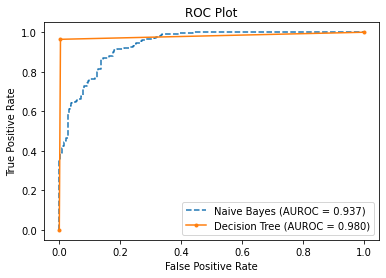

In [38]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Naive Bayes Avg. Accuracy = 83.8852097130243 %
Decision Tree Avg. Accuracy = 93.8852097130243 %
Bagging Accuracy: 88.74172185430463 %
Adaboost Accuracy: 88.30022075055187 %


c:\users\junai\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


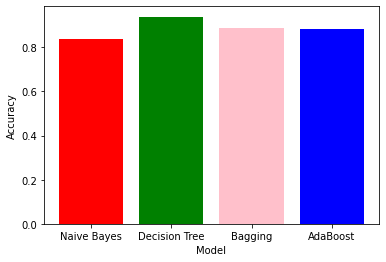

In [52]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from numpy import mean
from sklearn.metrics import accuracy_score

cv = KFold(n_splits=10, shuffle=True, random_state=1)
model = AdaBoostClassifier()
def evaluate_model(cv, model):
    X, y = get_dataset()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores), scores.min(), scores.max()


def naive_bayes_classification(X_train, X_test, y_train, y_test) :
    #Training gaussian model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    #Getting predictions
    y_pred = gnb.predict(X_test)
    return accuracy_score(y_test, y_pred)

def decision_tree_classification(X_train, X_test, y_train, y_test) :
    #Training decision tree
    dtc = tree.DecisionTreeClassifier(
        criterion="entropy",
        max_depth=4,
        max_features=2,
        max_leaf_nodes=None,
        min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0,
        random_state=None,
        splitter="best",
    )
    dtc.fit(X_train, y_train)
    #Getting predictions
    y_pred = dtc.predict(X_test)
    return accuracy_score(y_test, y_pred)

n_splits=10
#K-Fold Cross Validation
kf = KFold(n_splits=n_splits)
avg_score = [0, 0]
for trainIndex, testIndex in kf.split(df) :
    avg_score[0] += naive_bayes_classification(X_train, X_test, y_train, y_test)
    avg_score[1] += decision_tree_classification(X_train, X_test, y_train, y_test)
print(f"Naive Bayes Avg. Accuracy = {avg_score[0]*100/10} %")
print(f"Decision Tree Avg. Accuracy = {avg_score[1]*100/10} %")


#Bagging Ensemble model
estimators = [("naiveBayes", GaussianNB()), ("decisionTree", tree.DecisionTreeClassifier())]
baggingEnsemble = VotingClassifier(estimators)
baggingEnsemble.fit(X_train, y_train)
y_pred = baggingEnsemble.predict(X_test)
baggingAccuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Accuracy: {baggingAccuracy*100} %")


#Adaboost Ensemble model
adaboostEnsemble = AdaBoostClassifier(n_estimators=3)
adaboostEnsemble.fit(X_train, y_train)
y_pred = adaboostEnsemble.predict(X_test)
adaboostAccuracy = accuracy_score(y_test, y_pred)
print(f"Adaboost Accuracy: {adaboostAccuracy*100} %")


#Plotting 
plt.bar([1,2,3,4], [avg_score[0]/10,avg_score[1]/10,baggingAccuracy,adaboostAccuracy], 
color=["red","green","pink","blue"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks([1,2,3,4],["Naive Bayes", "Decision Tree", "Bagging", "AdaBoost"])
plt.show()